Practice with graph embeddings beginning with network visualization and hopefully ending with link prediction.

Michael A Goodrich
Brigham Young University

March 2023
***


Show the neato layout of the karate graph

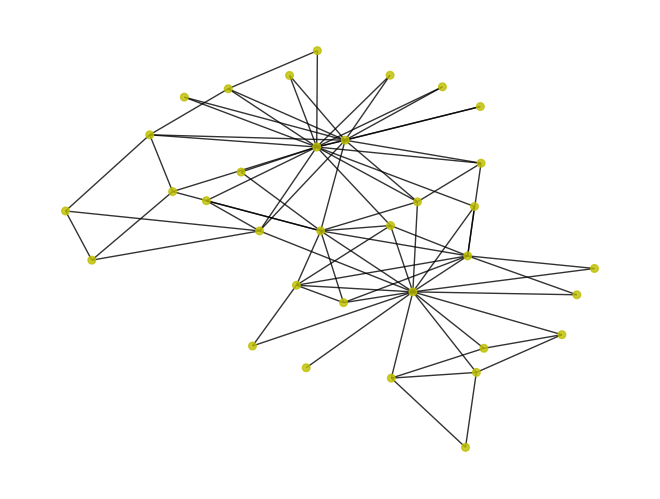

In [35]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

G = nx.karate_club_graph()
color_map = ['y' for node in G]
pos_dictionary = nx.nx_agraph.graphviz_layout(G,prog='neato')
nx.draw(G,pos_dictionary,node_color = color_map, alpha = 0.8, node_size = 30)

Show what happens when the x-axis is determined by the values of the fiedler vector. Let the y position be determined randomly, but make it fit in the range [-1,1]

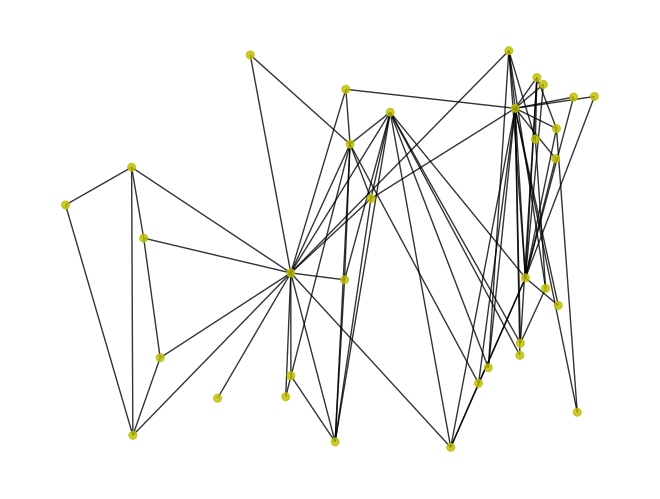

In [37]:
v = nx.fiedler_vector(G)
for key in pos_dictionary.keys():
    y = 2.0*np.random.random()-1.0 # Random value in range -1 to 1
    x = v[key] + 1
    pos_dictionary[key] = (x,y)
nx.draw(G,pos_dictionary,node_color = color_map, alpha = 0.8, node_size = 30)

        

When we use the values of the Fiedler vector for the x position, we start to see some structure. 

What should we use for the y position? Random looks bad.

Let's find the eigenvector corresponding to the third smallest eigenvalue. We can then use the values of this eigenvector for the y position.

[1.1871073  2.39431926]


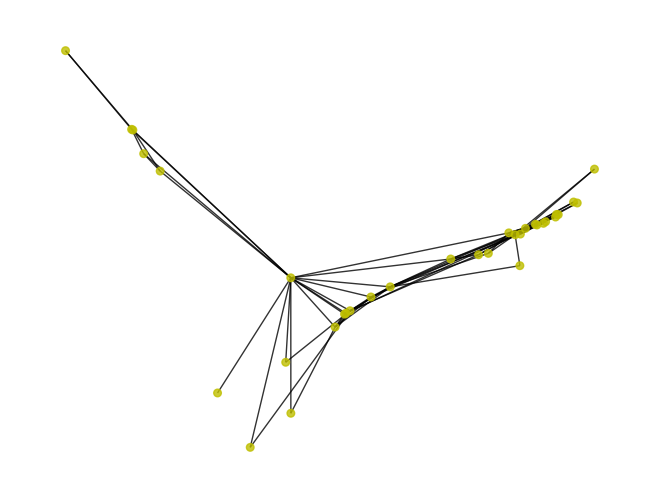

In [39]:
L = nx.laplacian_matrix(G).todense()
vals, vectors = np.linalg.eig(L)
sorted = np.sort(vals)
# Thanks to https://www.geeksforgeeks.org/python-get-match-indices/ for the algorithm
smallest_nonzero = sorted[1:3]
print(smallest_nonzero)
indices = [key for key, val in enumerate(vals)
                      if val in set(smallest_nonzero)]
fiedler_vector = vectors[:,indices[0]] # Fiedler vector
next_vector = vectors[:,indices[1]] # eigenvector for the third smallest eigenvalue
for key in pos_dictionary.keys():
    y = next_vector[key]
    x = fiedler_vector[key]
    pos_dictionary[key] = (x,y)
nx.draw(G,pos_dictionary,node_color = color_map, alpha = 0.8, node_size = 30)


The thing to notice about the plot above is not that it is visually appealing, but rather that similar nodes are in similar locations.  In this case, similarity is defined as having similar neighboring nodes.

The grouping of similar nodes together is called _embedding_, and is useful for doing machine learning on graphs.